# Processamento de linguagem natural com Spacy

## Importação das bibliotecas

In [ ]:
!pip install -q spacy==2.2.3 #Atualizado: 02/05/2021 Obs: utilizar esta versão.

In [2]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [ ]:
!python3 -m spacy download pt

## Marcação POS

- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [4]:
pln = spacy.load('pt')
pln

In [5]:
documento = pln('Exemplo para ser trabalhado com processamento de linguagem natural')

In [6]:
type(documento)

spacy.tokens.doc.Doc

In [ ]:
for token in documento:
  print(token.text, token.pos_)

## Lematização e stemização

In [9]:
for token in documento:
  print(token.text, token.lemma_)

Exemplo Exemplo
para parir
ser ser
trabalhado trabalhar
com com
processamento processamento
de de
linguagem linguagem
natural natural


In [ ]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

In [11]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [16]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('testando')

'test'

In [17]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Exemplo Exemplo exempl
para parir par
ser ser ser
trabalhado trabalhar trabalh
com com com
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur


mais recomendado lemma do que stemm

## Carregamento dos textos

In [18]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural')

In [19]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Processamento de linguagem natural \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"10000d40-2c04-4983-a998-6c066db8c464","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Processamento_de_linguagem_natural","wgTitle":"Processamento de linguagem natural","wgCurRevisionId":62067841,"wgRevisionId":62067841,"wgArticleId":516647,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1gina

In [20]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Processamento de linguagem natural – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"10000d40-2c04-4983-a998-6c066db8c464","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Processamento_de_linguagem_natural","wgTitle":"Processamento de linguagem natural","wgCurRevisionId":62067841,"wgRevisionId":62067841,"wgArticleId":516647,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Páginas com citações sem título","!Páginas com citações e URL

In [24]:
paragrafos = dados_html.find_all('p')

In [25]:
len(paragrafos)

45

In [28]:
paragrafos[0]

<p>
		Páginas para editores conectados <a aria-label="Saiba mais sobre edição" href="/wiki/Wikip%C3%A9dia:Boas-vindas"><span>saiba mais</span></a>
</p>

In [29]:
paragrafos[0].text

'\n\t\tPáginas para editores conectados saiba mais\n'

In [30]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [31]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\nProcessamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.\nA história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.\nEm 1954, a experiência de Georgetown envolveu a tradução a

In [ ]:
conteudo = conteudo.lower()
conteudo

## Buscas em textos

In [59]:
pln = spacy.load('pt') #vocabulario com palavra portuguesas
pln

In [84]:
string = 'natural'
token_pesquisa = pln(string)

In [85]:
pln.vocab

In [86]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('busca', None, token_pesquisa)

In [87]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(5048767159462669254, 11, 12),
 (5048767159462669254, 47, 48),
 (5048767159462669254, 69, 70),
 (5048767159462669254, 96, 97),
 (5048767159462669254, 108, 109),
 (5048767159462669254, 113, 114),
 (5048767159462669254, 286, 287),
 (5048767159462669254, 1304, 1305),
 (5048767159462669254, 1512, 1513),
 (5048767159462669254, 1517, 1518)]

In [68]:
doc[13:14], doc[13-6:14+4]

(pln, 
 processamento de língua natural (pln) é uma subárea)

In [71]:
matches[0][1]

57

In [88]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [89]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

alan turing PER
computing machinery and intelligence MISC
turing PER
georgetown PER
shrdlu PER
blocks worlds MISC
joseph weizenbaum PER
eliza PER
minha cabeça dói MISC
schank LOC
sam LOC
cullingford LOC
pam ORG
wilensky ORG
talespin LOC
meehan LOC
qualm LOC
lehnert PER
lehnert PER
parry PER
racter PER
jabberwacky PER
moore PER
linguagem[3 MISC
ibm ORG
canadá LOC
união europeia ORG
world wide web MISC
nll ORG
signll,[5 MISC
acl ORG
nll ORG
ner ORG
sentence boundary disambiguation MISC
sentiment analysis MISC
opinion mining ORG
ir ORG
pos ORG
pos novo ORG
caixa preta ORG
caixa preta ORG
iso ORG
subcomitê ORG
iso ORG
tc37 MISC
iso ORG
tc37 MISC
sc4 MISC
iso ORG
lmf ORG


In [ ]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvem de palavras e stop words

In [90]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'usar', 'cinco', 'porém', 'vossa', 'dá', 'mais', 'certamente', 'me', 'dezassete', 'três', 'doze', 'esteve', 'às', 'das', 'deve', 'meses', 'treze', 'esta', 'sou', 'dezasseis', 'ou', 'entre', 'adeus', 'fora', 'sua', 'no', 'só', 'estivestes', 'desse', 'dentro', 'sem', 'sexta', 'dois', 'podia', 'após', 'possível', 'quarto', 'tens', 'toda', 'números', 'demais', 'do', 'seis', 'relação', 'onze', 'através', 'embora', 'vinte', 'ele', 'os', 'sois', 'daquele', 'cima', 'conhecida', 'inclusive', 'outra', 'ter', 'nova', 'pôde', 'mas', 'naquele', 'sobre', 'pelos', 'algo', 'comprido', 'custa', 'oitavo', 'vosso', 'onde', 'apoio', 'não', 'diz', 'vez', 'estes', 'vocês', 'seria', 'ver', 'nos', 'quero', 'tivestes', 'ponto', 'vossos', 'tarde', 'apenas', 'zero', 'estou', 'tentaram', 'puderam', 'meu', 'eles', 'nossos', 'segundo', 'muitos', 'estivemos', 'esses', 'sétima', 'tendes', 'diante', 'estado', 'é', 'pouca', 'tipo', 'cada', 'ela', 'quer', 'põem', 'de', 'teve', 'duas', 'fez', 'bom', 'final', 'vens', 'po

In [91]:
len(STOP_WORDS)

413

In [92]:
pln.vocab['usa'].is_stop #se a word usa é uma stop_word

True

In [93]:
#mudando o texto do conteúdo para o formato do scipy
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [94]:
print(lista_token)

['\n\t\t', 'páginas', 'para', 'editores', 'conectados', 'saiba', 'mais', '\n', 'processamento', 'de', 'língua', 'natural', '(', 'pln', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'a', 'o', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'alguns', 'desafios', 'do', 'pln', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de'

In [95]:
len(lista_token)

2188

In [96]:
#removendo as stop words da sequencia de tokens
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [97]:
print(sem_stop)

['\n\t\t', 'páginas', 'editores', 'conectados', 'saiba', '\n', 'processamento', 'língua', 'natural', '(', 'pln', ')', 'subárea', 'ciência', 'computação', ',', 'inteligência', 'artificial', 'e', 'linguística', 'estuda', 'problemas', 'geração', 'e', 'compreensão', 'automática', 'línguas', 'humanas', 'naturais', '.', 'sistemas', 'geração', 'língua', 'natural', 'convertem', 'informação', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensível', 'a', 'o', 'humano', 'e', 'sistemas', 'compreensão', 'língua', 'natural', 'convertem', 'ocorrências', 'linguagem', 'humana', 'representações', 'formais', ',', 'facilmente', 'manipuláveis', 'programas', 'computador', '.', 'desafios', 'pln', 'compreensão', 'língua', 'natural', ',', 'computadores', 'extraiam', 'sentido', 'linguagem', 'humana', 'natural', 'e', 'geração', 'língua', 'natural', '.', '\n', 'a', 'história', 'pln', 'começou', 'década', '1950', ',', 'alan', 'turing', 'publicou', 'o', 'artigo', '"', 'computing', 'machinery', 'and', 'intel

In [98]:
len(sem_stop)

1447

In [104]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['blue', 'green', 'red', 'gray'])

In [105]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 50, colormap=color_map)

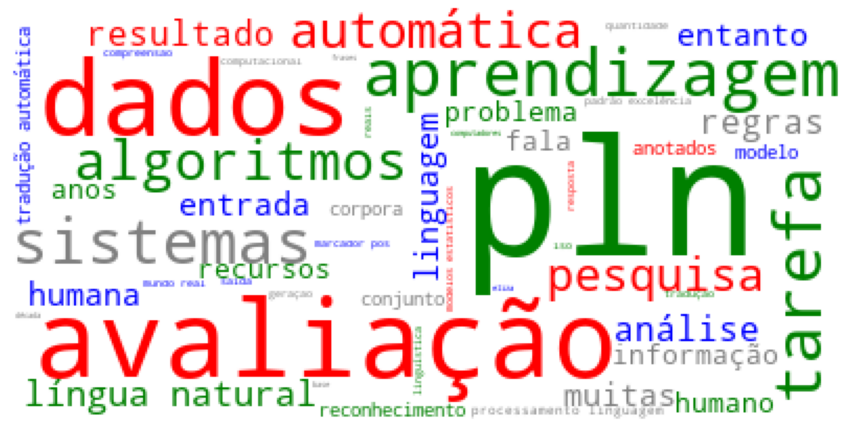

In [106]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()